# Python Request Library Exception Testing (Updated Functionality)

UPDATED FUNCTIONALITY

We will import Python's time module. Here, we have a sleep function which takes a float as an argument to pause the program iteration for a set amount of time


GOALS

Build a model that will test an API's request response time using Python Requests library elapsed time property.
We will play around with tiemout parameters and other to test our model expection handling and error raising is succesful. Further as highlighted above we will implement a function in our code that will pause the program for a set amount of time.

TESTING OBJECTIVES
- Use a pubic testing endpoint (for testing/data privacy purposes)
- Code this model using Python Requests linbrary
- Run x amount of tests (this will depend on functionality etc.)
- Implement more than one set of values into the Model for testing our Timeout paramters
- Extract the elapsed time disussed below form our Model (requests elapsed time property)
- Test exception error handling by changing model input values
- Input this into pandas dataframe and visually analyse our findings

Useful:

If a client/customer advises they are having issues with an API timing out(potentially at certain times etc.). Minimally the client may request the best timeout thresholds/paramters to succesfully hit the server and perform their required functionality. This in alot of cases will depend on other variables dependent on business needs such as traffic hitting server etc. This script will give a base level of testing.

The following script will build a Model that will help build/gauge the best timeout parameter's for an endpoint based on tesing data. Please see details further below.

##### Import Requried Libraries

In [1]:
import numpy as np
import pandas as pd

import json # Python built-in package json for encoding and decoding JSON data.
import requests # library for working with HTTP requests in Python

from requests.exceptions import Timeout
from requests.adapters import HTTPAdapter
from requests.exceptions import ConnectionError

import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
import time

In [2]:
# Model Timeout Paramter values
t1 = [0.1,0.2,'Label-Test-1'] # list data structure (ordered)
t2 = [0.4,0.6,'Label-Test-2']
t3 = [0.5,0.8,'Label-Test-3']
dict = {'test_1':t1,'test_2':t2,'test_3':t3} # add list data to dictionary

# Generate list data 1 - x for each individual test 
tests=[] # empty list
request_times = [] # UTC request time (note list data structure to maintain order of our data)
elapsed_times = [] # server response time
category = []

counter = 0 # Emply counter variable which will act as our model test threhold value ie. when the model will stop running

# loop that will build test range
for i in range(1,30,1): # range(start,stop.step)
    tests.append(i) # append (add) items to list

In [3]:
for key,value in dict.items(): # TEST-SET (3)
    print("-------------------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------------------")
    print("TEST-SET : ", key)
    #
    url = "https://api.coindesk.com/v1/bpi/currentprice.json"
    set_adapter = HTTPAdapter(max_retries = 3) # Build Transport Adapter, input max_retries parameter, and mount it to an existing Session:
    t_params = (value[0],value[1]) # connection timeout (connect,read) seconds
    
    #
    for test in tests:
        if counter < len(tests):
            counter += 1
            print("Test :",counter)
            print("Timeout-Paramter-Values : ", t_params)
            
            #
            with requests.Session() as session:
                session.mount(url, set_adapter)
                try:
                    #
                    response = session.get(url, timeout=t_params)
                    dt_request = datetime.now() # Getting the current date and time request executed/processes (time will be close to time server was hit for request)
                    request_times.append(dt_request)
                    timestamp = datetime.timestamp(dt_request) # Getting the timestamp (time will be close to time server was hit for request)
                    
                    #
                    response.raise_for_status() # check if succesfull repsonse code
                    print("Request-Status-Code : {}".format(response.raise_for_status)) # get request status code
                    print("Server Request Date | Time (UTC) : ", dt_request)
                    
                    # label
                    category.append(value[2])
                    print(value[2])
                    
                    #
                    print()
                    print("Requests-Proporty-Server-Repsonse-Time-Seconds",response.elapsed.total_seconds()) # requests property elapsed returns delta between request sent and response receieved
                    seconds = response.elapsed.total_seconds()
                    elapsed_times.append(seconds)
                    print()
                    
                    # 
                    time.sleep(1) # sleep function takes a float argument representing the number of seconds that the program will pause before running
                    
                    
                # requests Timeout(connect,read) error handling
                except requests.exceptions.ConnectTimeout as error: # request timed out while trying to connect to the remote server.
                    print("Connect-Timeout-Error")
                    raise SystemExit(error)
                except requests.exceptions.ReadTimeout as error:
                    print("Read-Timeout-Error")
                    raise SystemExit(error)
                
                # requests Connection error handling
                except requests.exceptions.ConnectionError as error:
                    print("Connetion Error Raised")
                    raise SystemExit(error)
                
                # requests HTTP status error handling
                except requests.exceptions.HTTPError as error:
                    print("HTTP Error Raised")
                    raise SystemExit(error)
                    
        # stop/exit model
        if counter >= len(tests):
            counter = 0

# Create DataFrame using dictionariy data sturcutre and dataframe method
threshold = pd.DataFrame ({'Request Time UTC':request_times,'Server Request Response Time Seconds':elapsed_times,'Test-Label':category})
threshold.head()

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------
TEST-SET :  test_1
Test : 1
Timeout-Paramter-Values :  (0.1, 0.2)
Request-Status-Code : <bound method Response.raise_for_status of <Response [200]>>
Server Request Date | Time (UTC) :  2023-12-28 16:03:01.201155
Label-Test-1

Requests-Proporty-Server-Repsonse-Time-Seconds 0.108812

Test : 2
Timeout-Paramter-Values :  (0.1, 0.2)
Request-Status-Code : <bound method Response.raise_for_status of <Response [200]>>
Server Request Date | Time (UTC) :  2023-12-28 16:03:02.301413
Label-Test-1

Requests-Proporty-Server-Repsonse-Time-Seconds 0.078104

Test : 3
Timeout-Paramter-Values :  (0.1, 0.2)
Request-Status-Code : <bound method Response.raise_for_status of <Response [200]>>
Server Request Date | Time (UTC) :  2023-12-28 16:03:03.363856
Label-Test-1

Requests-Propo

,Request Time UTC,Server Request Response Time Seconds,Test-Label
0,2023-12-28 16:03:01.201155,0.108812,Label-Test-1
1,2023-12-28 16:03:02.301413,0.078104,Label-Test-1
2,2023-12-28 16:03:03.363856,0.059992,Label-Test-1
3,2023-12-28 16:03:04.428229,0.056830,Label-Test-1
4,2023-12-28 16:03:05.504025,0.062576,Label-Test-1


In [4]:
# subsetting based on categorical data (Pandas isin method)
t1 = threshold['Test-Label'].isin(['Label-Test-1'])
t1 = threshold[t1]
t2 = threshold['Test-Label'].isin(['Label-Test-2'])
t2 = threshold[t2]
t3 = threshold['Test-Label'].isin(['Label-Test-3'])
t3 = threshold[t3]

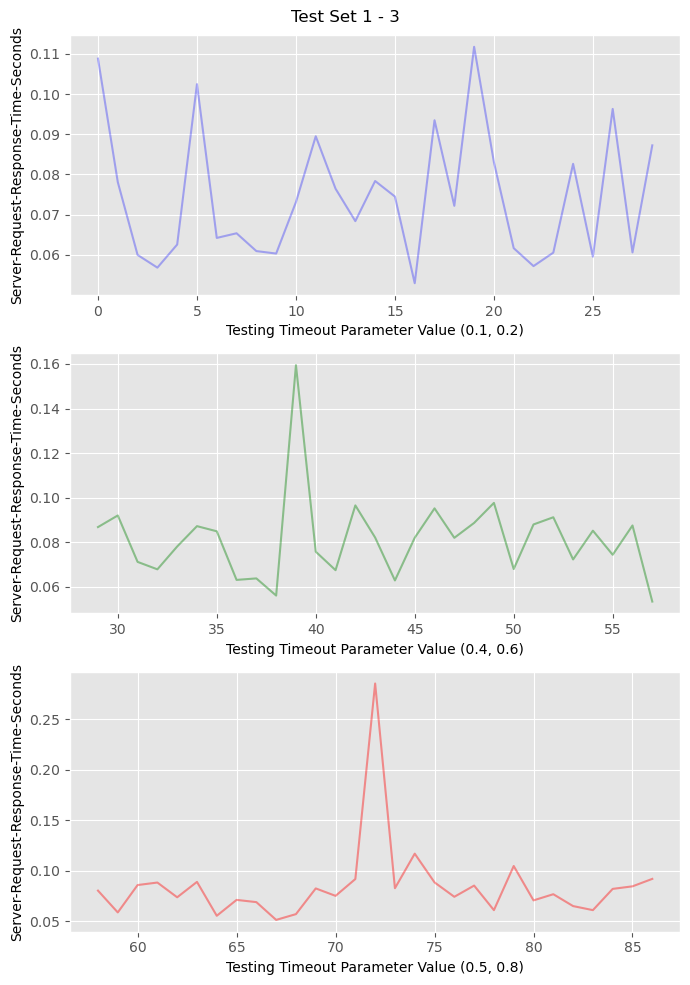

In [5]:
# Generate Line Plots (Subplots)
plt.style.use('ggplot')
fig, ax = plt.subplots(3, figsize = (7,10), sharey= False)
fig.suptitle('Test Set 1 - 3')

#
ax[0].plot(t1.index, t1['Server Request Response Time Seconds'],color = 'b', alpha = 0.3)
ax[1].plot(t2.index, t2['Server Request Response Time Seconds'], color = 'g', alpha = 0.4)
ax[2].plot(t3.index, t3['Server Request Response Time Seconds'], color = 'r', alpha = 0.4)

#Set xlabes
ax[0].set_xlabel('Testing Timeout Parameter Value (0.1, 0.2)')
ax[1].set_xlabel('Testing Timeout Parameter Value (0.4, 0.6)')
ax[2].set_xlabel('Testing Timeout Parameter Value (0.5, 0.8)')

#set y labels
ax[0].set_ylabel('Server-Request-Response-Time-Seconds')
ax[1].set_ylabel('Server-Request-Response-Time-Seconds')
ax[2].set_ylabel('Server-Request-Response-Time-Seconds')

#Set spacing
fig.tight_layout()
plt.show()

### EVALUATION
- Shortening both the connect and read timeout paramters enable us to test the Timeout exception handling. This confirmed that our models exception handling is working as expected and will raise an errors here.
- Changing one of the values in the url string apramter means the connection will not work. This has been tested confirming ConnectionError rasies succesfully.
- Testing the HTTP error is not currently testable using the endpoint.

- Re-evaluation of our data and line plot indicate that our timeout parameters for testing have not been surpassed. Previous analysis this was miss-interpreted. The line plot displays the elapsed time property which is the total time taken to compelte the request. Our timeout parameters include both connect and read inputs. To help determine if our timeout parameters have been surpassed we add both the connect & read input values for a given test and check if the elapsed time propert recorded per tests breaches the total timeout value. 

### CONCLUSION
Testimg above provides strong evidence that our timeout parameters per test have not been breached and our exception handling in the program is running succesfully.
